**DBSCAN based Covid-19 Contact Tracer**

**Contact tracing is the name of the process used to identify those who come into contact with people who have tested positive for contagious diseases like COVID-19. During a pandemic, performing contact tracing correctly can help reduce the number of people to get infected or speed up the process of treating infected people. Doing so can help save many lives.**

**DBSCAN**
**DBSCAN is a density-based data clustering algorithm that groups data points in a given space. The DBSCAN algorithm groups data points close to each other and marks outlier data points as noise. I will use the DBSCAN algorithm for the task of contact tracing with Machine Learning.**

**We'll be using contact tracing algorithm that relies on GPS data, which can be used in contact tracing with machine learning.**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json('MOCK_DATA.json')
dataFrame=df
df.tail()

,User,TimeStamp,Longitude,Latitude
95,James,2020-08-27 23:52:26,60.087861,13.991382
96,William,2020-08-27 05:07:33,60.031707,13.993157
97,William,2020-08-27 02:33:14,60.043339,13.956026
98,John,2020-08-27 01:03:58,60.026532,13.983008
99,John,2020-08-27 19:01:08,60.086588,13.934874


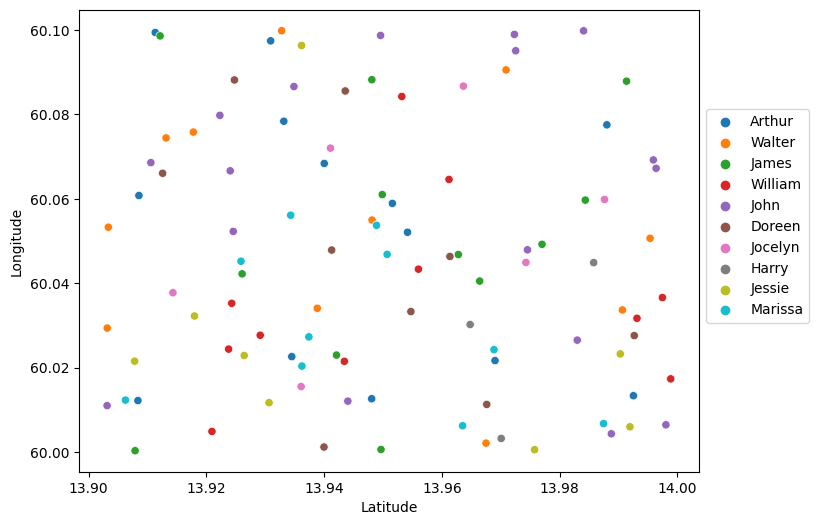

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='User')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

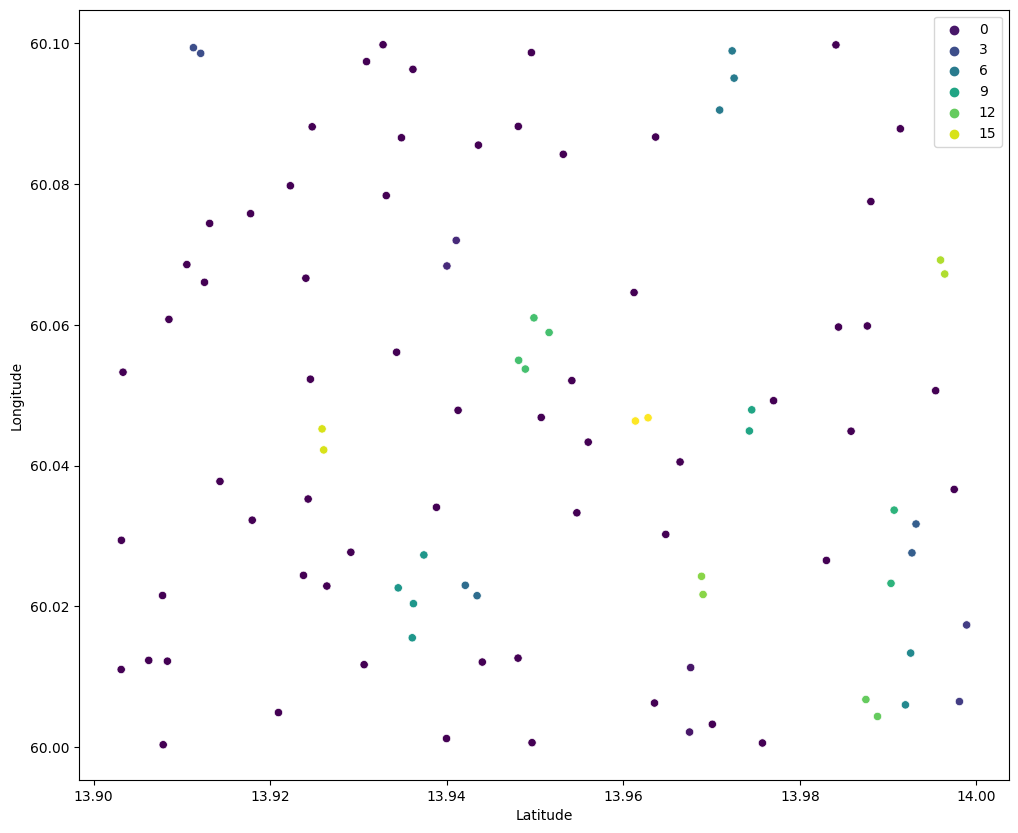

In [13]:
# epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
# model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['Latitude', 'Longitude']])
# labels = model.labels_
# fig = plt.figure(figsize=(12,10))
# sns.scatterplot(df['Latitude'], df['Longitude'], hue = ['cluster-{}'.format(x) for x in labels])
# #sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
# plt.legend(bbox_to_anchor = [1, 1])
# plt.show()

epsilon = 0.0018288  # A radial distance of 6 feet in kilometers
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['Latitude', 'Longitude']])
labels = model.labels_

# Create a 'cluster' column in the DataFrame for cluster labels
df['cluster'] = labels

fig = plt.figure(figsize=(12, 10))
sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='cluster', palette='viridis')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()


In [14]:
def Get_Infected_Peoples(dataFrame, inputName):
    #Check if name is valid
    assert (inputName in dataFrame['User'].tolist()), "User Doesn't exist"
    #Social distance
    safe_distance = 0.0018288 #6 feets in kilometers
    #Apply model, in case of larger dataset or noisy one, increase min_samples
    model = DBSCAN(eps=safe_distance, min_samples=2, metric='haversine').fit(dataFrame[['Latitude', 'Longitude']])
    #Get clusters found bt the algorithm 
    labels = model.labels_
    #Add the clusters to the dataframe
    dataFrame['Cluster'] = model.labels_.tolist()
    #Get the clusters the inputName is a part of
    inputNameClusters = set()
    for i in range(len(dataFrame)):
        if dataFrame['User'][i] == inputName:
            inputNameClusters.add(dataFrame['Cluster'][i])
   #Get people who are in the same cluster as the inputName              
    infected = set()
    for cluster in inputNameClusters:
        if cluster != -1: #as long as it is not the -1 cluster
            namesInCluster = dataFrame.loc[dataFrame['Cluster'] == cluster, 'User'] #Get all names in the cluster
            for i in range(len(namesInCluster)):
              #locate each name on the cluster
                name = namesInCluster.iloc[i]
                if name != inputName: #Don't want to add the input to the results
                    infected.add(name)
    print("Infected people are:",*infected,sep="\n" )

**Tracing people who were infected by an already +ve tested person**

**To find people who may be infected by the patient, we’ll just call the "Get_Infected_Peoples" function and enter a name from the dataset as a parameter:**

In [17]:
input_name=input('Enter the name of suspected person: ')
Get_Infected_Peoples(dataFrame, input_name)

Enter the name of suspected person: William
Infected people are:
James
John
Doreen
